In [10]:
# Import libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [8]:
## Data Source: https://www.kaggle.com/manjeetsingh/retaildataset
# read the ['Features data set.csv', 'sales data-set.csv', 'stores data-set.csv'] from the /data folder
import os
print("current directory is : " + os.getcwd()) 
print('the folder contains:') 
print(os.listdir("."))

data = pd.read_csv('list.txt')

current directory is : /home/dragos/projects/document_vs_logo_img_classification
the folder contains:
['list.txt', '.ipynb_checkpoints', 'document_type_classification.ipynb', '.git', 'README.md', 'img_data_extract.ipynb', 'download_imgs from internet.ipynb', 'downloads', 'Untitled.ipynb']


In [9]:
######## 1. Understand the data and cleanup ##############
data.head()

,path,type,filename,width,height,size
0,downloads/invoice_m,invoice,44.d5f5ab14809fb5b39c88cab57805c03f32546b01.png,805,608,49201
1,downloads/invoice_m,invoice,52.Sample_invoice.png,565,724,133057
2,downloads/invoice_m,invoice,67.invoices.png,558,294,72250
3,downloads/invoice_m,invoice,75.LARGE_635747981557862333@eninvoice.png,690,973,115642
4,downloads/invoice_m,invoice,23.invoice-main.png,586,492,36200


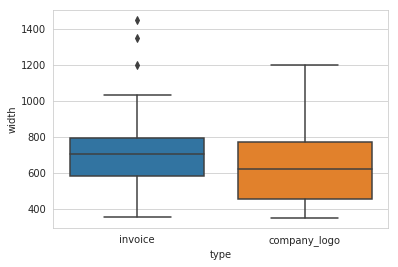

In [11]:
sns.set_style('whitegrid')
sns.boxplot(x='type',y='width', data=data)

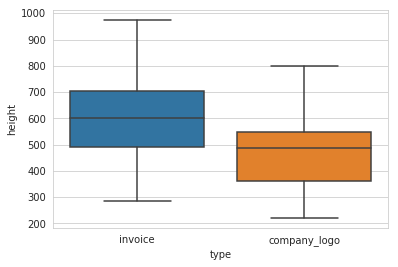

In [12]:
sns.set_style('whitegrid')
sns.boxplot(x='type',y='height', data=data)

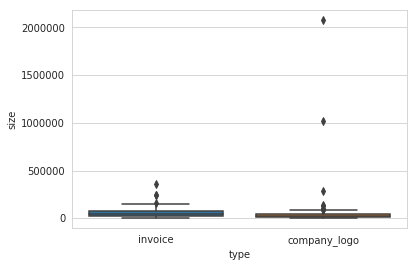

In [13]:
sns.set_style('whitegrid')
sns.boxplot(x='type',y='size', data=data)

In [15]:
data.describe()

,width,height,size
count,148.000000,148.000000,1.480000e+02
mean,676.594595,538.337838,6.741374e+04
std,206.669931,161.898497,1.916551e+05
min,350.000000,220.000000,2.486000e+03
25%,500.750000,419.000000,1.536475e+04
50%,675.000000,522.500000,2.648700e+04
75%,786.000000,646.250000,6.463875e+04
max,1446.000000,973.000000,2.074463e+06


In [20]:
# https://medium.com/datadriveninvestor/choosing-the-best-algorithm-for-your-classification-model-7c632c78f38f
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.model_selection import train_test_split


In [21]:
X  = data[['width','height','size']]
y= data['type']
#Split the Data into Training and Testing sets with test size as #30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [22]:
classifiers = []

model1 = xgboost.XGBClassifier()
classifiers.append(model1)

model2 = svm.SVC()
classifiers.append(model2)

model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)

model4 = RandomForestClassifier()
classifiers.append(model4)

In [24]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) is 0.6222222222222222
Confusion Matrix of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) is [[ 9 11]
 [ 6 19]]
Accuracy of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,

/home/dragos/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/dragos/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
